In [20]:
import pandas as pd 
import os
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt

font = {'fontname':'Times New Roman'}
size = {'fontsize':'14'}

#save_path = r"/Users/nglaser3/Downloads/lab3_deliverable_plots/"
path = r"C:\Users\reape\Desktop\Sp24\NPRE 451\lab5\lab 5 data\\"
file_names = os.listdir(path)
file_names= sorted(file_names)
Dict = {}
keys = np.array([])
for files in file_names:
    file = np.array(pd.read_csv(path+files,engine='python'))
    Dict[files] = file
    keys = np.append(keys,files)
keys = sorted(keys)
org_key = keys[:5]
in_key = keys[6:-1]
org_cal = keys[5]
in_cal = keys[-1]
Dict[org_key[2]]=Dict[org_key[2]]+Dict[org_key[3]]
del(org_key[3])
org_key = org_key
Dict[in_key[2]]=Dict[in_key[2]]+Dict[in_key[3]]
del(in_key[3])
in_key = in_key

In [14]:
Ey = 661.7 #keV
a = Ey/(511)

def E_e(x):
    E_e = a*(1-np.cos(x))/(1+a*(1-np.cos(x)))*Ey
    return E_e

def E_y(x):
    E_y = Ey/(1+a*(1-np.cos(x)))
    return E_y

ang = np.array([0,np.pi/6,np.pi/3,np.pi/2,np.pi])
e_ener = E_e(ang)
g_ener = E_y(ang)

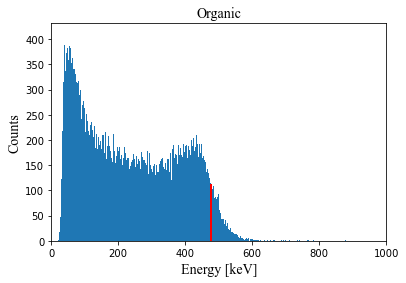

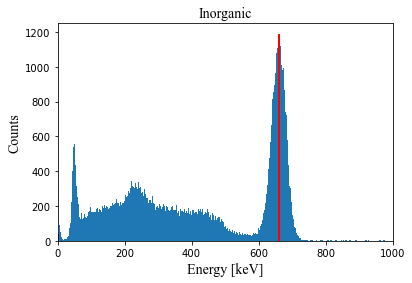

In [33]:
#deliv 1

o_cal = Dict[org_cal]
jawn = o_cal[200:]
loc_o_cal = np.where(o_cal == max(jawn)/2+.5)[0][0]
e_o = e_ener[-1]/loc_o_cal

plt.hist(np.arange(len(o_cal))*e_o,bins = len(o_cal),weights = o_cal)
plt.xlim(0,1000)
plt.title('Organic', **font, **size)
plt.xlabel('Energy [keV]', **font, **size)
plt.ylabel('Counts', **font, **size)
plt.bar(loc_o_cal*e_o,o_cal[loc_o_cal], width=5, color = 'r')
plt.show()

#calibration for energy, inorganic
i_cal = Dict[in_cal]
e_i = g_ener[0]/np.argmax(i_cal)

plt.hist(np.arange(len(i_cal))*e_i,bins = len(i_cal),weights = i_cal)
plt.title('Inorganic', **font, **size)
plt.xlabel('Energy [keV]', **font, **size)
plt.ylabel('Counts', **font, **size)
plt.bar(1784*e_i,i_cal[1784], width=5, color = 'r')
plt.xlim(0,1000)
plt.show()

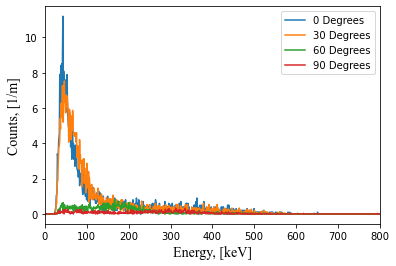

In [35]:
#deliverable 3
t_of_trial = [10,15,25,30]
org_names = ['0 Degrees','30 Degrees','60 Degrees','90 Degrees']
for i in range(len(org_key)):
    y = Dict[org_key[i]]/t_of_trial[i]
    x = np.arange(len(y))*e_o
    plt.plot(x,y,label=org_names[i])
plt.xlabel('Energy, [keV]', **font, **size)
plt.ylabel('Counts, [1/m]', **font, **size)
plt.xlim(0, 800)
plt.legend()
plt.show()

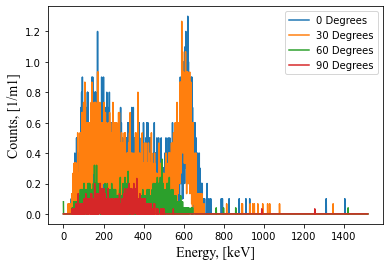

In [36]:
#deliverable 4
t_of_trial = [10,15,25,30]
org_names = ['0 Degrees','30 Degrees','60 Degrees','90 Degrees']
for i in range(len(in_key)):
    y = Dict[in_key[i]]/t_of_trial[i]
    x = np.arange(len(y))*e_i
    plt.plot(x,y,label=org_names[i])
plt.xlabel('Energy, [keV]', **font, **size)
plt.ylabel('Counts, [1/m1]', **font, **size)
plt.legend()
plt.show()